# Loading the Dataset

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
dset1 = pd.read_csv('Plant_Parameters.csv')
dset1.head()

,pH,Soil EC,Phosphorus,Potassium,Urea,T.S.P,M.O.P,Moisture,Temperature,Plant Type
0,6.021428,0.237700,15.987947,133.206193,45.627373,16.952809,23.362074,79.234006,52.094083,Carrots
1,6.342420,0.211844,15.305906,137.856536,59.460887,18.378723,22.143606,75.612889,51.349760,Carrots
2,6.684784,0.290343,14.778959,132.994257,53.567383,17.207365,27.448977,77.277833,61.162072,Carrots
3,6.552203,0.407055,12.328408,109.766048,41.053263,12.086209,21.630035,76.426754,72.280843,Carrots
4,6.705262,0.533824,11.215420,102.429536,37.250965,14.953550,24.008938,76.718368,58.710557,Carrots


<h3> Let's explore the whole data</h3>

In [17]:
print("First five rows")
print(dset1.head())
print("*********")
print("columns",dset1.columns)
print("*********")
print("shape:",dset1.shape)
print("*********")
print("Size:",dset1.size)
print("*********")
print("no of samples available for each type") 
print(dset1["Plant Type"].value_counts())
print("*********")
print(dset1.describe())

First five rows
         pH   Soil EC  Phosphorus   Potassium       Urea      T.S.P  \
0  6.021428  0.237700   15.987947  133.206193  45.627373  16.952809   
1  6.342420  0.211844   15.305906  137.856536  59.460887  18.378723   
2  6.684784  0.290343   14.778959  132.994257  53.567383  17.207365   
3  6.552203  0.407055   12.328408  109.766048  41.053263  12.086209   
4  6.705262  0.533824   11.215420  102.429536  37.250965  14.953550   

       M.O.P   Moisture  Temperature Plant Type  
0  23.362074  79.234006    52.094083    Carrots  
1  22.143606  75.612889    51.349760    Carrots  
2  27.448977  77.277833    61.162072    Carrots  
3  21.630035  76.426754    72.280843    Carrots  
4  24.008938  76.718368    58.710557    Carrots  
*********
columns Index(['pH', 'Soil EC', 'Phosphorus', 'Potassium', 'Urea', 'T.S.P', 'M.O.P',
       'Moisture', 'Temperature', 'Plant Type'],
      dtype='object')
*********
shape: (100000, 10)
*********
Size: 1000000
*********
no of samples available for

<h2> Checking Null values </h2>

In [18]:
headers = ['pH'	,'Soil EC', 'Phosphorus',	'Potassium', 'Urea'	, 'T.S.P', 'M.O.P',	'Moisture',	'Temperature',	'Plant Type']
missing_in_dset1 = dset1.isnull()
for column in headers:
    print(missing_in_dset1[column].value_counts())
    print("")

pH
False    100000
Name: count, dtype: int64

Soil EC
False    100000
Name: count, dtype: int64

Phosphorus
False    100000
Name: count, dtype: int64

Potassium
False    100000
Name: count, dtype: int64

Urea
False    100000
Name: count, dtype: int64

T.S.P
False    100000
Name: count, dtype: int64

M.O.P
False    100000
Name: count, dtype: int64

Moisture
False    100000
Name: count, dtype: int64

Temperature
False    100000
Name: count, dtype: int64

Plant Type
False    100000
Name: count, dtype: int64



<p>Our datasets does not contain any null values</p>

In [19]:
dset1.columns

Index(['pH', 'Soil EC', 'Phosphorus', 'Potassium', 'Urea', 'T.S.P', 'M.O.P',
       'Moisture', 'Temperature', 'Plant Type'],
      dtype='object')

<h2> Feature Extraction</h2>

In [20]:
dset1.drop(['Soil EC','T.S.P','M.O.P','Moisture'], axis = 1, inplace = True)


In [21]:
dset1.head()

,pH,Phosphorus,Potassium,Urea,Temperature,Plant Type
0,6.021428,15.987947,133.206193,45.627373,52.094083,Carrots
1,6.342420,15.305906,137.856536,59.460887,51.349760,Carrots
2,6.684784,14.778959,132.994257,53.567383,61.162072,Carrots
3,6.552203,12.328408,109.766048,41.053263,72.280843,Carrots
4,6.705262,11.215420,102.429536,37.250965,58.710557,Carrots


In [22]:
dset1.columns

Index(['pH', 'Phosphorus', 'Potassium', 'Urea', 'Temperature', 'Plant Type'], dtype='object')

In [23]:
target_arr = dset1['Plant Type'].unique()
target_arr

array(['Carrots', 'Chili', 'Cinnamon', 'Corn', 'Eggplant', 'Rice',
       'Strawberries', 'Sunflowers', 'Tomato', 'Wheat'], dtype=object)

<h2>Class Extraction</h2>

In [24]:
plants_to_remove = ['Chili', 'Corn', 'Eggplant', 'Sunflowers', 'Strawberries']

In [25]:
dset1 = dset1[~dset1['Plant Type'].isin(plants_to_remove)]

In [26]:
target_arr = dset1['Plant Type'].unique()
target_arr

array(['Carrots', 'Cinnamon', 'Rice', 'Tomato', 'Wheat'], dtype=object)

In [27]:
crop_summary = pd.pivot_table(dset1,index=['Plant Type'],
                              aggfunc='mean')

In [29]:
crop_summary

,Phosphorus,Potassium,Temperature,Urea,pH
Plant Type,,,,,
Carrots,15.027109,124.852524,62.615675,45.069435,6.400231
Cinnamon,10.025273,59.881833,77.005769,30.002477,6.000843
Rice,30.062732,149.836370,80.045294,44.894577,6.001054
Tomato,22.519303,175.088958,77.488591,74.741487,6.403515
Wheat,22.368967,225.384143,59.975312,30.054136,6.752307


<Axes: ylabel='Plant Type'>

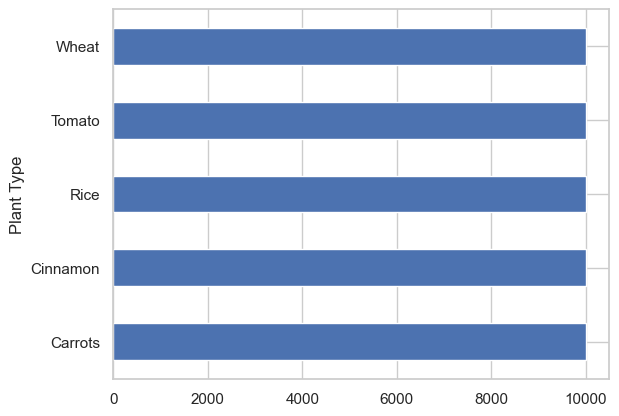

In [101]:
dset1['Plant Type'].value_counts().plot(kind="barh")

<p> Classes are well distributed </p>

In [30]:
grouped = dset1.groupby("Plant Type")

<h2> Attributes Comparison for each class </h2>

Text(0.5, 1.0, 'Comparison of Mean Phosphorus Levels Among Different Classes')

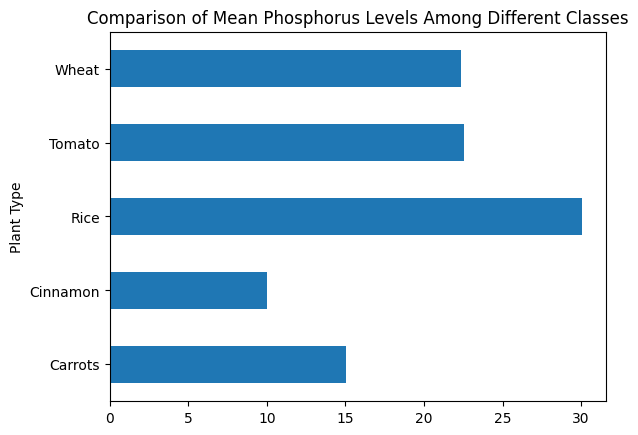

In [31]:
grouped.mean()["Phosphorus"].plot(kind="barh")
plt.title('Comparison of Mean Phosphorus Levels Among Different Classes')

<p> Rice demands high amount of Phosphorus </p>

Text(0.5, 1.0, 'Comparison of Mean Postassium Levels Among Different Classes')

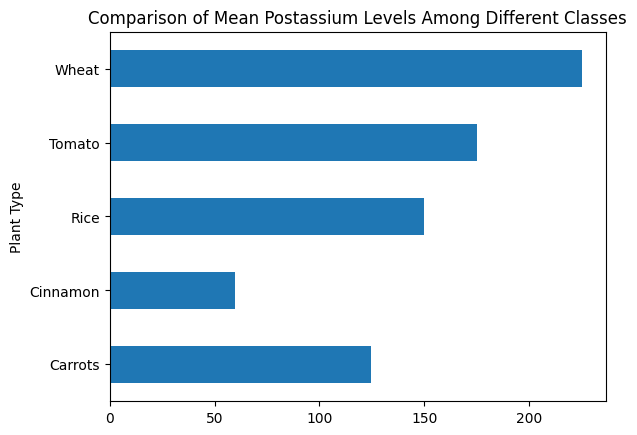

In [32]:
grouped.mean()["Potassium"].plot(kind="barh")
plt.title('Comparison of Mean Postassium Levels Among Different Classes')

<p> Wheat needs high amount of Potassium and Tomato becomes the second highest Postassium demander</p>

Text(0.5, 1.0, 'Comparison of Mean Temperature Levels Among Different Classes')

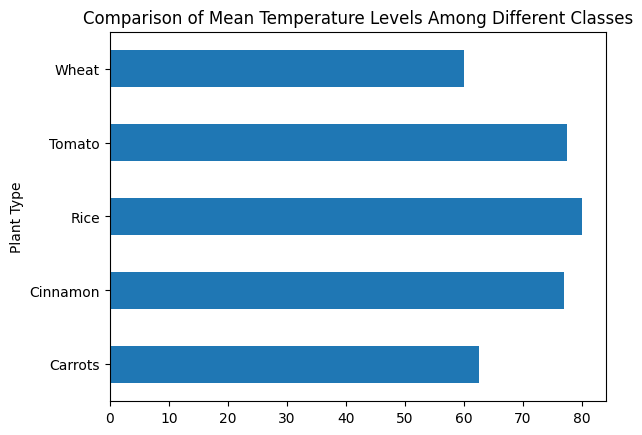

In [33]:
grouped.mean()["Temperature"].plot(kind="barh")
plt.title('Comparison of Mean Temperature Levels Among Different Classes')

<p> Tomato, Rice and Cinnamon grows in high temperature situation</p>

Text(0.5, 1.0, 'Comparison of Mean Urea Levels Among Different Classes')

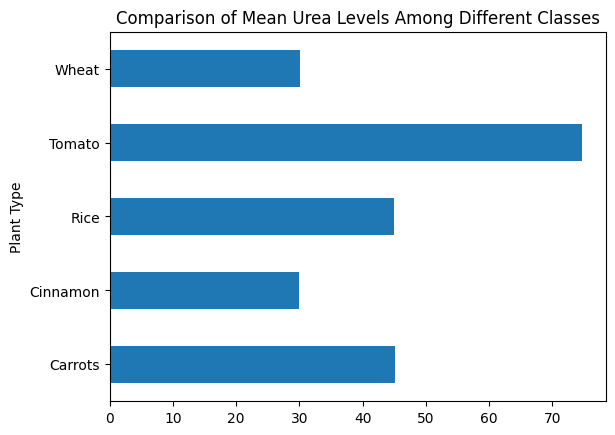

In [34]:
grouped.mean()["Urea"].plot(kind="barh")
plt.title('Comparison of Mean Urea Levels Among Different Classes')

<p> Tomato demands high Urea </p>

<h2> Heatmap </h2>

Text(0.5, 1.0, 'Correlation Heatmap of  Features')

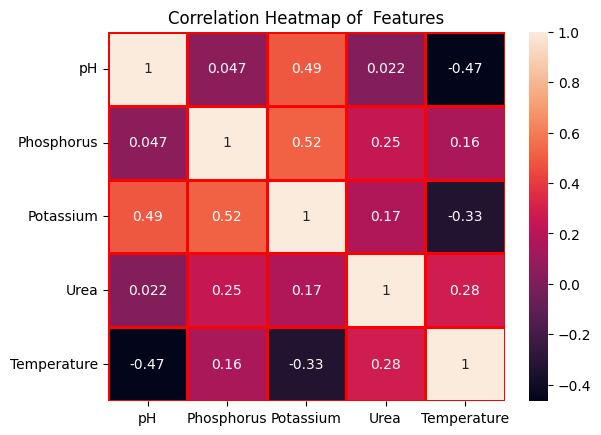

In [35]:
linewidth = 2
linecolor = "red"

sns.heatmap(data=dset1.select_dtypes(include='number').corr(),
            annot=True, 
            linewidth = linewidth, 
            linecolor = linecolor)
plt.title('Correlation Heatmap of  Features')

<h3> Checking the Outliers by drawing Boxplots </h3>

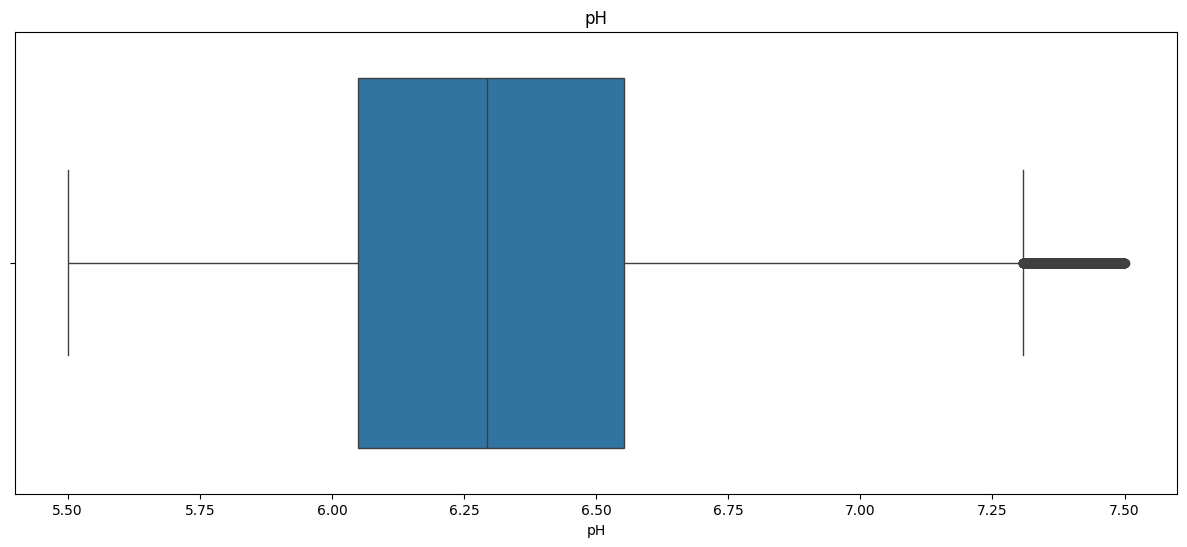

In [36]:

x= dset1['pH']
plt.figure(figsize=(15,6))
sns.boxplot(x, orient = 'h')

plt.title("pH")
plt.show()

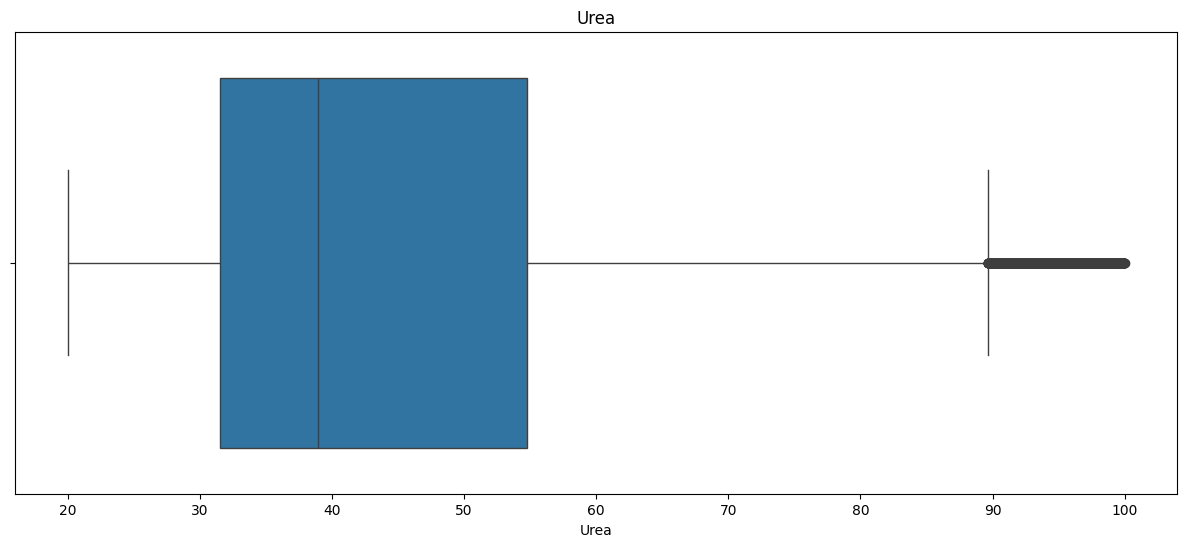

In [37]:
x= dset1['Urea']
plt.figure(figsize=(15,6))
sns.boxplot(x, orient = 'h')

plt.title('Urea')
plt.show()

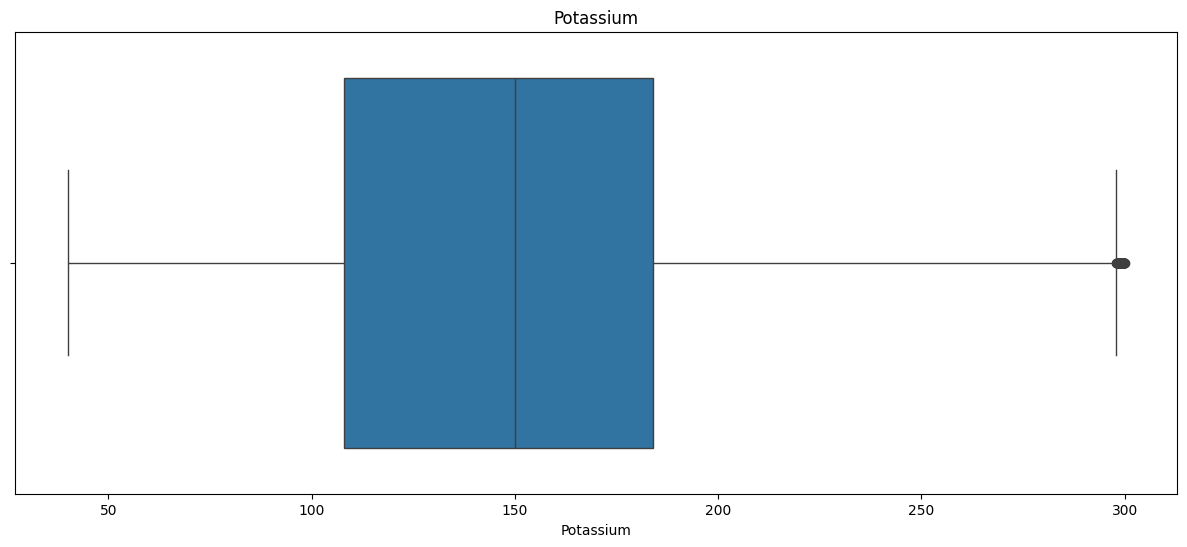

In [38]:
x= dset1['Potassium']
plt.figure(figsize=(15,6))
sns.boxplot(x, orient = 'h')

plt.title('Potassium')
plt.show()

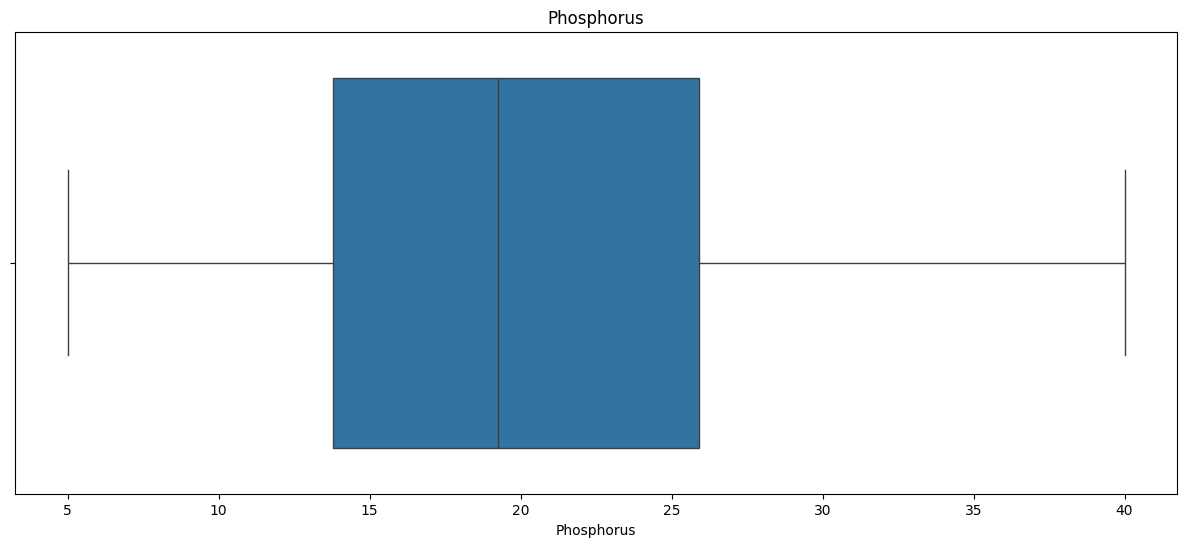

In [39]:
x= dset1['Phosphorus']
plt.figure(figsize=(15,6))
sns.boxplot(x, orient = 'h')

plt.title('Phosphorus')
plt.show()

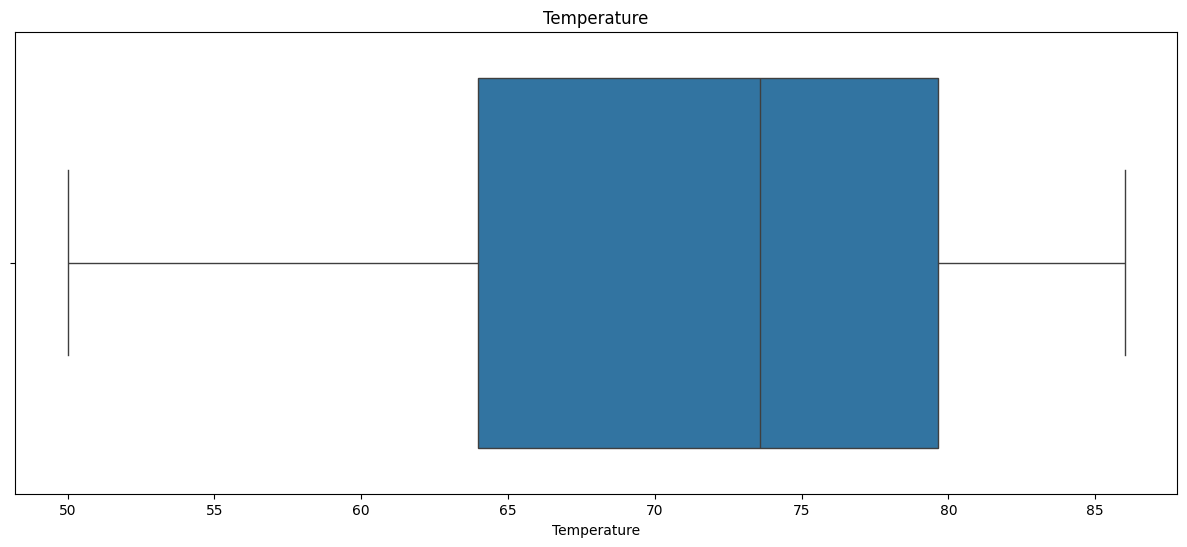

In [40]:
x= dset1['Temperature']
plt.figure(figsize=(15,6))
sns.boxplot(x, orient = 'h')

plt.title('Temperature')
plt.show()

<p> We have detected outliers on pH, Urea, Potassium </p>

<h2> Outliers Removal Using IQR </h2>

In [41]:
import pandas as pd

columns_with_outliers = ['pH', 'Urea', 'Potassium']

def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
  
        IQR = Q3 - Q1
      
        outlier_step = 1.5 * IQR
        
        outliers_indices = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
    
        df.drop(outliers_indices, inplace=True)
    return df


dset1_no_outliers = remove_outliers(dset1, columns_with_outliers)


print("DataFrame after removing outliers:")
print(dset1_no_outliers)


DataFrame after removing outliers:
             pH  Phosphorus   Potassium       Urea  Temperature Plant Type
0      6.021428   15.987947  133.206193  45.627373    52.094083    Carrots
1      6.342420   15.305906  137.856536  59.460887    51.349760    Carrots
2      6.684784   14.778959  132.994257  53.567383    61.162072    Carrots
3      6.552203   12.328408  109.766048  41.053263    72.280843    Carrots
4      6.705262   11.215420  102.429536  37.250965    58.710557    Carrots
...         ...         ...         ...        ...          ...        ...
99995  7.196021   19.708113  280.755698  31.383916    53.184197      Wheat
99996  6.873112   26.297676  255.078223  35.567096    56.200390      Wheat
99997  7.105025   20.474570  154.382908  26.809462    69.783946      Wheat
99998  6.823575   22.757910  249.442899  38.109926    65.488271      Wheat
99999  6.155405   23.724507  156.422924  34.205366    66.266840      Wheat

[46519 rows x 6 columns]


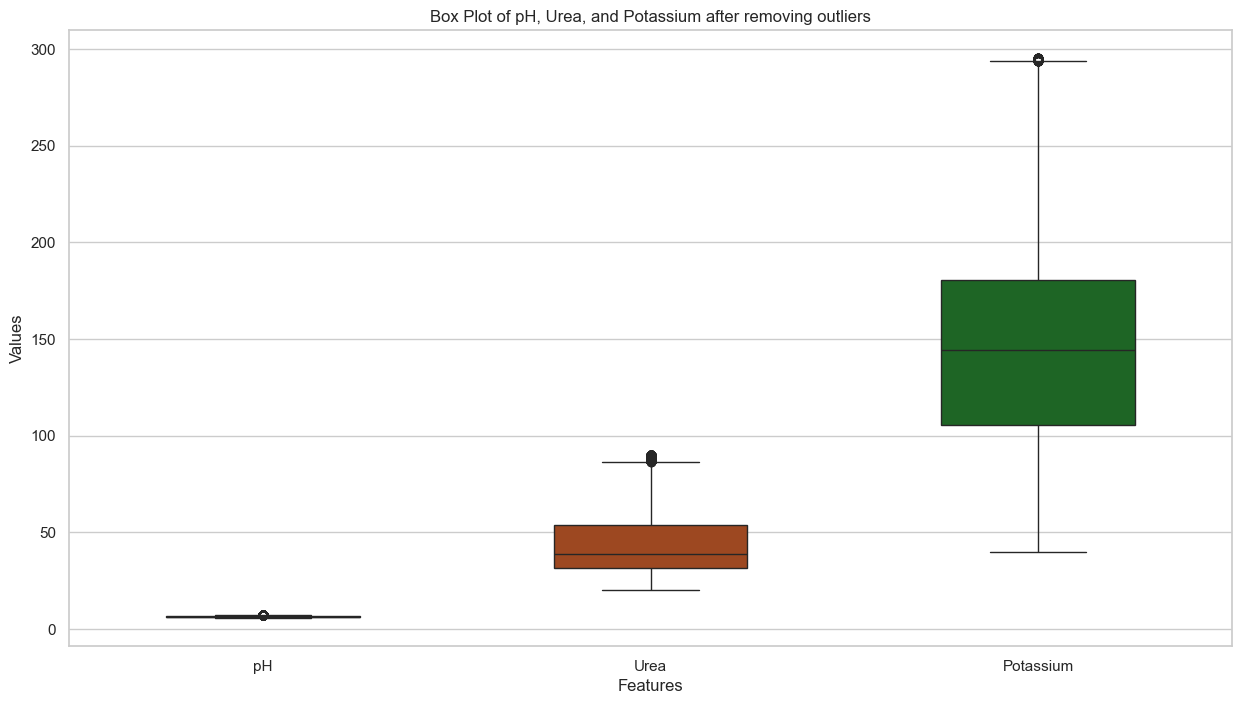

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.concat([dset1['pH'], dset1['Urea'], dset1['Potassium']], axis=1)

sns.set(style="whitegrid")

plt.figure(figsize=(15, 8))
sns.boxplot(data=data, palette="dark", width=0.5)  # Adjust width for better aspect ratio
plt.title('Box Plot of pH, Urea, and Potassium after removing outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


Text(0.5, 1.0, ' Data Counts of Each Class After Outlier Removal')

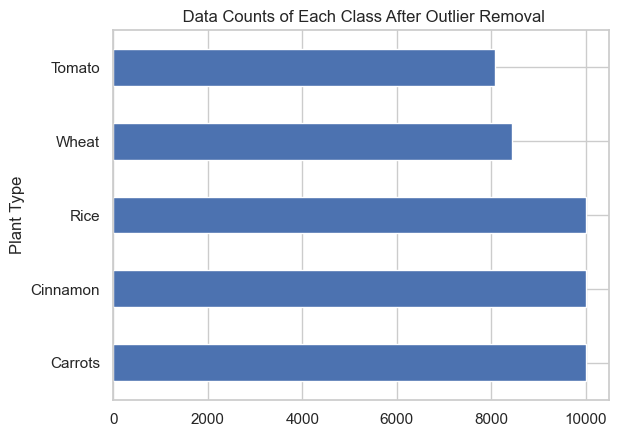

In [43]:
dset1['Plant Type'].value_counts().plot(kind="barh")

plt.title(" Data Counts of Each Class After Outlier Removal" )

In [44]:
dset1['Plant Type'].value_counts()

Plant Type
Carrots     10000
Cinnamon    10000
Rice        10000
Wheat        8437
Tomato       8082
Name: count, dtype: int64

In [45]:
import pandas as pd
import numpy as np

target_count = 8082

undersampled_data = []

for plant_type in dset1['Plant Type'].unique():
 
    plant_type_data = dset1[dset1['Plant Type'] == plant_type]

    if len(plant_type_data) > target_count:
       
        undersampled_data.append(plant_type_data.sample(n=target_count, random_state=42))
    else:
      
        undersampled_data.append(plant_type_data)

undersampled_dset1 = pd.concat(undersampled_data)


undersampled_dset1.reset_index(drop=True, inplace=True)

print("Undersampled DataFrame:")
print(undersampled_dset1)

undersampled_dset1.to_csv('D:/Minor project/undersampled_dset1.csv', index=False)



Undersampled DataFrame:
             pH  Phosphorus   Potassium       Urea  Temperature Plant Type
0      6.603303   13.439841  118.457287  46.721161    68.100019    Carrots
1      6.301647   12.212518  129.300855  48.354409    58.575150    Carrots
2      6.352778   12.196417  132.158769  50.753150    63.976764    Carrots
3      6.002879   19.595836  140.922475  43.134850    56.546316    Carrots
4      6.506089   18.233838  132.162593  40.319410    68.034217    Carrots
...         ...         ...         ...        ...          ...        ...
40405  6.016032   20.810115  166.128158  32.874171    62.044409      Wheat
40406  7.021798   27.500610  215.247046  37.011227    61.268109      Wheat
40407  7.168223   17.915710  249.587377  20.309813    56.901594      Wheat
40408  6.706742   26.243480  291.874582  33.886227    65.858113      Wheat
40409  6.964055   20.412016  259.334905  34.465648    53.510919      Wheat

[40410 rows x 6 columns]


In [46]:
dset1=pd.read_csv('undersampled_dset1.csv')

In [47]:
print("First five rows")
print(dset1.head())
print("*********")
print("Datasets Overview after Outliers Removal")
print("columns",dset1.columns)
print("*********")

print("shape:",dset1.shape)
print("*********")
print("Size:",dset1.size)
print("*********")
print("no of samples available for each type") 
print(dset1["Plant Type"].value_counts())
print("*********")
print(dset1.describe())

First five rows
         pH  Phosphorus   Potassium       Urea  Temperature Plant Type
0  6.603303   13.439841  118.457287  46.721161    68.100019    Carrots
1  6.301647   12.212518  129.300855  48.354409    58.575150    Carrots
2  6.352778   12.196417  132.158769  50.753150    63.976764    Carrots
3  6.002879   19.595836  140.922475  43.134850    56.546316    Carrots
4  6.506089   18.233838  132.162593  40.319410    68.034217    Carrots
*********
Datasets Overview after Outliers Removal
columns Index(['pH', 'Phosphorus', 'Potassium', 'Urea', 'Temperature', 'Plant Type'], dtype='object')
*********
shape: (40410, 6)
*********
Size: 242460
*********
no of samples available for each type
Plant Type
Carrots     8082
Cinnamon    8082
Rice        8082
Tomato      8082
Wheat       8082
Name: count, dtype: int64
*********
                 pH    Phosphorus     Potassium          Urea   Temperature
count  40410.000000  40410.000000  40410.000000  40410.000000  40410.000000
mean       6.294121   

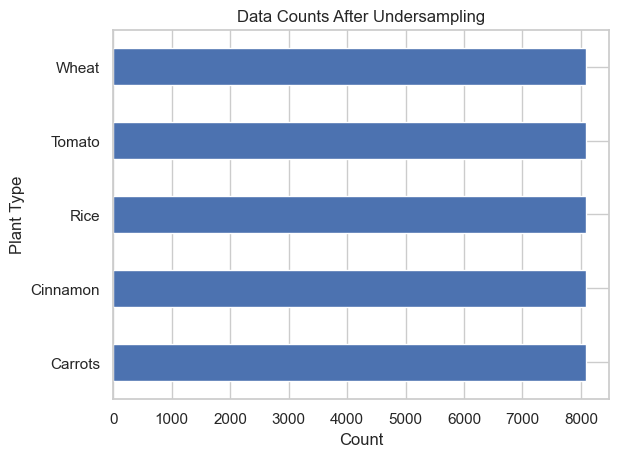

In [48]:
dset1['Plant Type'].value_counts().plot(kind="barh")
plt.title("Data Counts After Undersampling")
plt.xlabel("Count")
plt.ylabel("Plant Type")
plt.show()


<h3> Z-score Normalization </h3>


In [50]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = ['pH', 'Phosphorus', 'Potassium', 'Urea', 'Temperature']

scaler = StandardScaler()


dset1[columns_to_normalize] = scaler.fit_transform(dset1[columns_to_normalize])

In [51]:
dset1.head(5)

,pH,Phosphorus,Potassium,Urea,Temperature,Plant Type
0,0.801187,-0.814803,-0.469046,0.162313,-0.335427,Carrots
1,0.019504,-0.967142,-0.287094,0.259374,-1.295741,Carrots
2,0.152000,-0.969140,-0.239139,0.401928,-0.751141,Carrots
3,-0.754699,-0.050707,-0.092087,-0.050816,-1.500292,Carrots
4,0.549276,-0.219762,-0.239075,-0.218133,-0.342061,Carrots


<h1> Data Modeling </h1>

In [52]:
from sklearn.model_selection import train_test_split

features = dset1[['pH', 'Phosphorus','Potassium','Urea','Temperature']]
target = dset1['Plant Type']

xtrain, xtest, ytrain, ytest = train_test_split(features,
                                                target,
                                                test_size=0.2,
                                                random_state=None)


In [53]:

best_model = {}

In [54]:

from sklearn.model_selection import cross_val_score

def cross_val_accuracy(model):

    score = cross_val_score(model, features, target,cv=5)
 
    return score.mean() * 100

In [55]:
import pickle
import os

def save_model(model, modelname):
 
    directory = 'C:/Users/OmNamaSibaya/Desktop/'
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    pkl_filename = os.path.join(directory, modelname)

    with open(pkl_filename, 'wb') as model_pkl:
        
        pickle.dump(model, model_pkl)
    print(f"Model '{modelname}' saved successfully.")




<h1>Decision Trees </h1>

In [56]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion = "entropy",
                                     random_state = None,
                                     max_depth = 5)

DecisionTree.fit(xtrain,ytrain)

ypred = DecisionTree.predict(xtest)

accuracy = metrics.accuracy_score(ypred,ytest)
print(f"Accuracy: {accuracy}",end='\n\n')


best_model["Decision Tree"] = accuracy*100
print(best_model)

Accuracy: 0.9816877010640931

{'Decision Tree': 98.16877010640931}


In [57]:
print(f"Cross Validation Accuracy {cross_val_accuracy(DecisionTree)}")

Cross Validation Accuracy 98.32962138084632


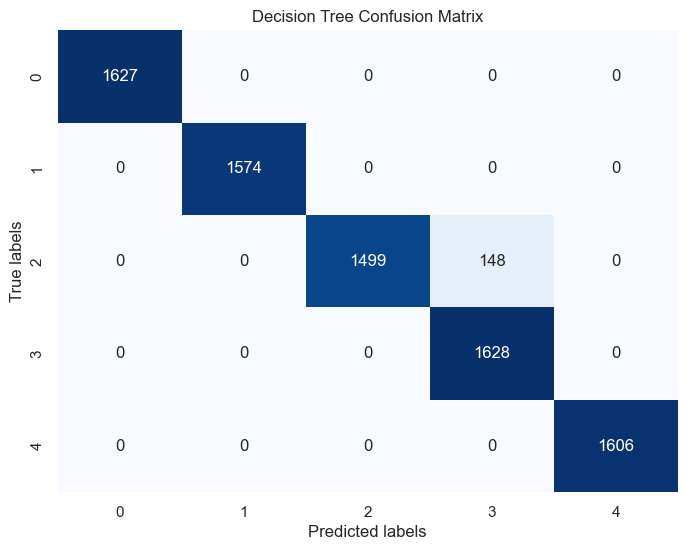

In [58]:
from sklearn.metrics import confusion_matrix
dt_conf_matrix = confusion_matrix(ytest, ypred)


plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Decision Tree Confusion Matrix')
plt.show()


In [60]:
from sklearn.metrics import classification_report
from tabulate import tabulate

class_report = classification_report(ytest, ypred, output_dict=True)


macro_avg = class_report['macro avg']
weighted_avg = class_report['weighted avg']

overall_report = {
    'Precision': [macro_avg['precision'], weighted_avg['precision']],
    'Recall': [macro_avg['recall'], weighted_avg['recall']],
    'F1-Score': [macro_avg['f1-score'], weighted_avg['f1-score']],
    'Support': [macro_avg['support'], weighted_avg['support']]
}


overall_report_df = pd.DataFrame(overall_report, index=['Macro Avg', 'Weighted Avg'])


print("Decision Tree Classification Report:")
print(tabulate(overall_report_df, headers='keys', tablefmt='fancy_grid'))

Decision Tree Classification Report:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│              │   Precision │   Recall │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ Macro Avg    │    0.983333 │ 0.982028 │   0.981896 │      8082 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Weighted Avg │    0.983214 │ 0.981688 │   0.981655 │      8082 │
╘══════════════╧═════════════╧══════════╧════════════╧═══════════╛


In [124]:
save_model(DecisionTree,'D:/Minor project/model/decisionTree.pkl')

Model 'D:/Minor project/model/decisionTree.pkl' saved successfully.


<h1> Random Forest </h1>

In [61]:

from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(n_estimators=20, random_state=None)

RandomForest.fit(xtrain,ytrain)

ypred = RandomForest.predict(xtest)

accuracy = metrics.accuracy_score(ypred, ytest)
print(f"Accuracy: {accuracy}",end='\n\n')

best_model["Random Forest"] = accuracy*100
print(best_model)

Accuracy: 0.9883692155407078

{'Decision Tree': 98.16877010640931, 'Random Forest': 98.83692155407078}


In [62]:
print(f"Cross Validation Accuracy {cross_val_accuracy(RandomForest)}")

Cross Validation Accuracy 98.87156644394952


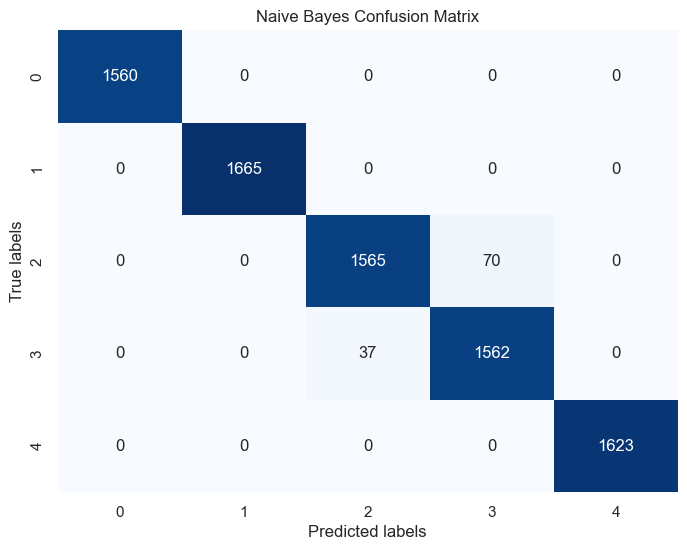

In [56]:
nb_conf_matrix = confusion_matrix(ytest, ypred)

plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

In [63]:
from sklearn.metrics import classification_report
from tabulate import tabulate

class_report = classification_report(ytest, ypred, output_dict=True)


macro_avg = class_report['macro avg']
weighted_avg = class_report['weighted avg']

overall_report = {
    'Precision': [macro_avg['precision'], weighted_avg['precision']],
    'Recall': [macro_avg['recall'], weighted_avg['recall']],
    'F1-Score': [macro_avg['f1-score'], weighted_avg['f1-score']],
    'Support': [macro_avg['support'], weighted_avg['support']]
}


overall_report_df = pd.DataFrame(overall_report, index=['Macro Avg', 'Weighted Avg'])


print("RF Classification Report:")
print(tabulate(overall_report_df, headers='keys', tablefmt='fancy_grid'))

RF Classification Report:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│              │   Precision │   Recall │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ Macro Avg    │    0.988579 │ 0.988543 │   0.988519 │      8082 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Weighted Avg │    0.988453 │ 0.988369 │   0.988369 │      8082 │
╘══════════════╧═════════════╧══════════╧════════════╧═══════════╛


In [134]:
save_model(RandomForest,'D:/Minor project/model/RandomForest.pkl')

Model 'D:/Minor project/model/RandomForest.pkl' saved successfully.


<h1> Naive Bayes </h1>

In [64]:

from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()


NaiveBayes.fit(xtrain,ytrain)

ypred = NaiveBayes.predict(xtest)

accuracy = metrics.accuracy_score(ypred,ytest)
print(f"Accuracy: {accuracy}",end='\n\n')

best_model["Naive Bayes"] = accuracy*100
print(best_model)

Accuracy: 0.983791140806731

{'Decision Tree': 98.16877010640931, 'Random Forest': 98.83692155407078, 'Naive Bayes': 98.3791140806731}


In [65]:
print(f"Cross Validation Accuracy {cross_val_accuracy(NaiveBayes)}")

Cross Validation Accuracy 98.29497649096758


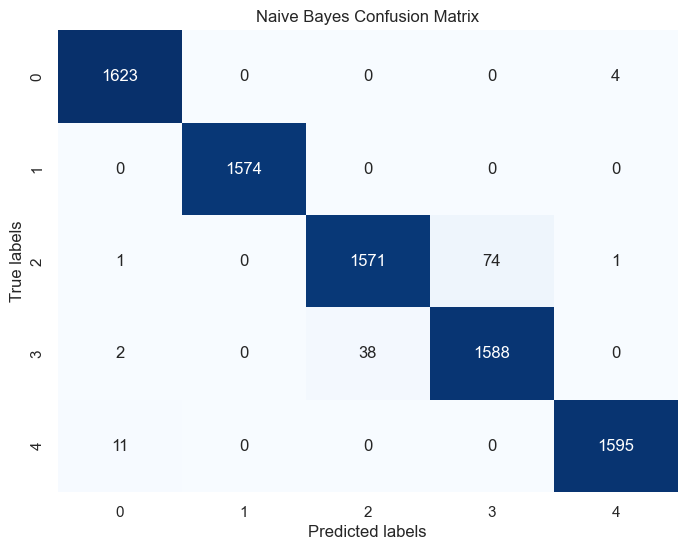

In [66]:
nb_conf_matrix = confusion_matrix(ytest, ypred)


plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

In [67]:
from sklearn.metrics import classification_report
from tabulate import tabulate

class_report = classification_report(ytest, ypred, output_dict=True)


macro_avg = class_report['macro avg']
weighted_avg = class_report['weighted avg']

overall_report = {
    'Precision': [macro_avg['precision'], weighted_avg['precision']],
    'Recall': [macro_avg['recall'], weighted_avg['recall']],
    'F1-Score': [macro_avg['f1-score'], weighted_avg['f1-score']],
    'Support': [macro_avg['support'], weighted_avg['support']]
}


overall_report_df = pd.DataFrame(overall_report, index=['Macro Avg', 'Weighted Avg'])


print("Naive Bayes Classification Report:")
print(tabulate(overall_report_df, headers='keys', tablefmt='fancy_grid'))

Naive Bayes Classification Report:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│              │   Precision │   Recall │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ Macro Avg    │    0.984036 │ 0.983996 │   0.983966 │      8082 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Weighted Avg │    0.983876 │ 0.983791 │   0.983783 │      8082 │
╘══════════════╧═════════════╧══════════╧════════════╧═══════════╛


In [149]:
save_model(NaiveBayes,'D:/Minor project/model/NaiveBayes.pkl')

Model 'D:/Minor project/model/NaiveBayes.pkl' saved successfully.


<h1> Support Vector Machine </h1>

In [68]:

from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(xtrain)
x_train_norm = norm.transform(xtrain)

x_test_norm = norm.transform(xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(x_train_norm,ytrain)
ypred = SVM.predict(x_test_norm)

accuracy = metrics.accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}",end='\n\n')

best_model["SVM"] = accuracy*100
print(best_model)



Accuracy: 0.9845335313041327

{'Decision Tree': 98.16877010640931, 'Random Forest': 98.83692155407078, 'Naive Bayes': 98.3791140806731, 'SVM': 98.45335313041326}


In [69]:
print(f"Cross Validation Accuracy {cross_val_accuracy(SVM)}")

Cross Validation Accuracy 97.7604553328384


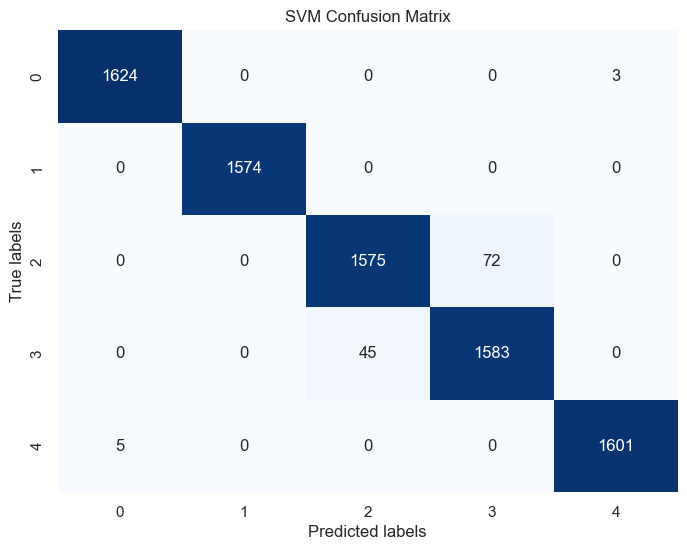

In [70]:
svm_conf_matrix = confusion_matrix(ytest, ypred)

plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('SVM Confusion Matrix')
plt.show()

In [71]:
from sklearn.metrics import classification_report
from tabulate import tabulate

class_report = classification_report(ytest, ypred, output_dict=True)


macro_avg = class_report['macro avg']
weighted_avg = class_report['weighted avg']

overall_report = {
    'Precision': [macro_avg['precision'], weighted_avg['precision']],
    'Recall': [macro_avg['recall'], weighted_avg['recall']],
    'F1-Score': [macro_avg['f1-score'], weighted_avg['f1-score']],
    'Support': [macro_avg['support'], weighted_avg['support']]
}


overall_report_df = pd.DataFrame(overall_report, index=['Macro Avg', 'Weighted Avg'])


print("SVM Classification Report:")
print(tabulate(overall_report_df, headers='keys', tablefmt='fancy_grid'))

SVM Classification Report:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│              │   Precision │   Recall │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ Macro Avg    │    0.984756 │ 0.984737 │   0.98472  │      8082 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Weighted Avg │    0.984586 │ 0.984534 │   0.984533 │      8082 │
╘══════════════╧═════════════╧══════════╧════════════╧═══════════╛


In [160]:
save_model(SVM,'D:/Minor project/model/SVM.pkl')

Model 'D:/Minor project/model/SVM.pkl' saved successfully.


<h2> Soft Voting Classifier </h2>

In [73]:
from sklearn.ensemble import VotingClassifier

decision_tree = DecisionTreeClassifier(criterion="entropy", random_state=None, max_depth=5)
random_forest = RandomForestClassifier(n_estimators=20, random_state=None)
naive_bayes = GaussianNB()
svm_classifier = SVC(kernel='poly', degree=3, C=1, probability=True)  # Set probability=True

classifiers = [('Decision Tree', decision_tree),
               ('Random Forest', random_forest),
               ('Naive Bayes', naive_bayes),
               ('SVM', svm_classifier)]

voting_classifier = VotingClassifier(estimators=classifiers, voting='soft')

voting_classifier.fit(xtrain, ytrain)

ypred_voting = voting_classifier.predict(xtest)
accuracy_voting = metrics.accuracy_score(ytest, ypred_voting)
print(f"Ensemble Model Accuracy: {accuracy_voting}")

best_model["Ensemble"] = accuracy_voting * 100
print(best_model)

Ensemble Model Accuracy: 0.9884929472902747
{'Decision Tree': 98.16877010640931, 'Random Forest': 98.83692155407078, 'Naive Bayes': 98.3791140806731, 'SVM': 98.45335313041326, 'Ensemble': 98.84929472902748}


In [74]:
print(f"Cross Validation Accuracy {cross_val_accuracy(voting_classifier)}")

Cross Validation Accuracy 98.98045038356842


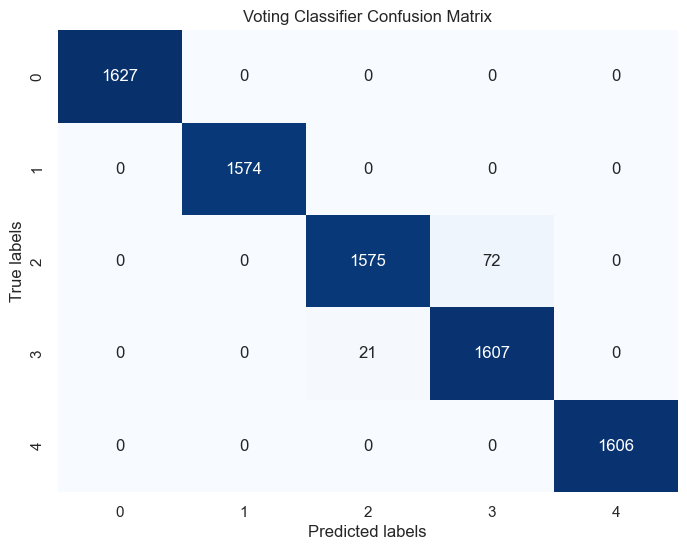

In [75]:
voting_conf_matrix = confusion_matrix(ytest, ypred_voting)

plt.figure(figsize=(8, 6))
sns.heatmap(voting_conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Voting Classifier Confusion Matrix')
plt.show()

In [76]:
from sklearn.metrics import classification_report
from tabulate import tabulate

class_report = classification_report(ytest, ypred_voting, output_dict=True)


macro_avg = class_report['macro avg']
weighted_avg = class_report['weighted avg']

overall_report = {
    'Precision': [macro_avg['precision'], weighted_avg['precision']],
    'Recall': [macro_avg['recall'], weighted_avg['recall']],
    'F1-Score': [macro_avg['f1-score'], weighted_avg['f1-score']],
    'Support': [macro_avg['support'], weighted_avg['support']]
}


overall_report_df = pd.DataFrame(overall_report, index=['Macro Avg', 'Weighted Avg'])


print("Voting Classification Report:")
print(tabulate(overall_report_df, headers='keys', tablefmt='fancy_grid'))

Voting Classification Report:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│              │   Precision │   Recall │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ Macro Avg    │    0.988792 │ 0.988677 │   0.98864  │      8082 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Weighted Avg │    0.988681 │ 0.988493 │   0.988491 │      8082 │
╘══════════════╧═════════════╧══════════╧════════════╧═══════════╛


<h2> Comparing Result </h2>

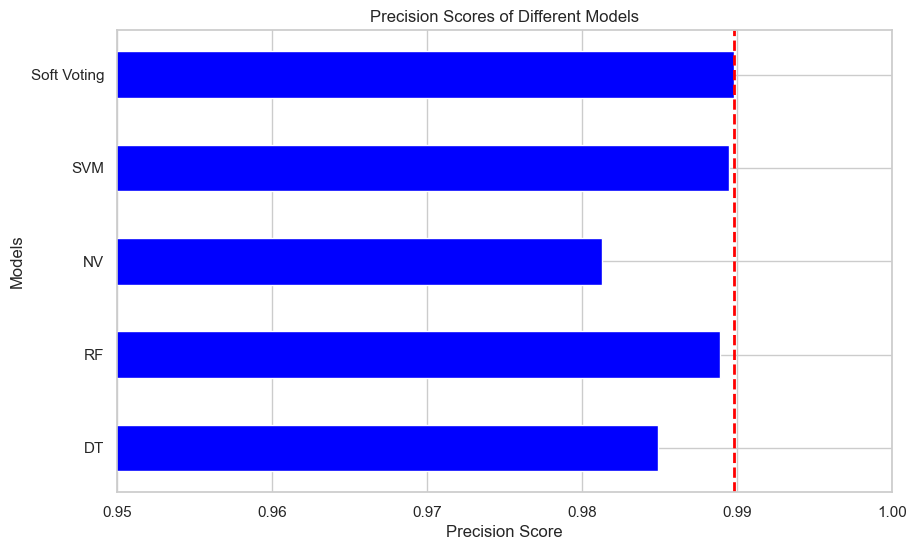

In [78]:
import matplotlib.pyplot as plt


soft_voting_precision = 0.989782
other_models_precision = {
    'DT': 0.984864,
    'RF': 0.988901,
    'NV': 0.98128,
    'SVM': 0.9894887
}


other_models_precision['Soft Voting'] = soft_voting_precision


data_to_plot = [list(other_models_precision.values())]
model_names = list(other_models_precision.keys())

plt.figure(figsize=(10, 6))
plt.barh(range(len(data_to_plot[0])), data_to_plot[0], color='blue', height=0.5)

plt.yticks(range(len(data_to_plot[0])), model_names)
plt.xlim(0.9500, 1.0000)  # Setting x-axis limits

max_recall = max(data_to_plot[0])
plt.axvline(x=max_recall, color='red', linestyle='--', linewidth=2)

plt.title('Precision Scores of Different Models')
plt.xlabel('Precision Score')
plt.ylabel('Models')
plt.grid(True)
plt.show()

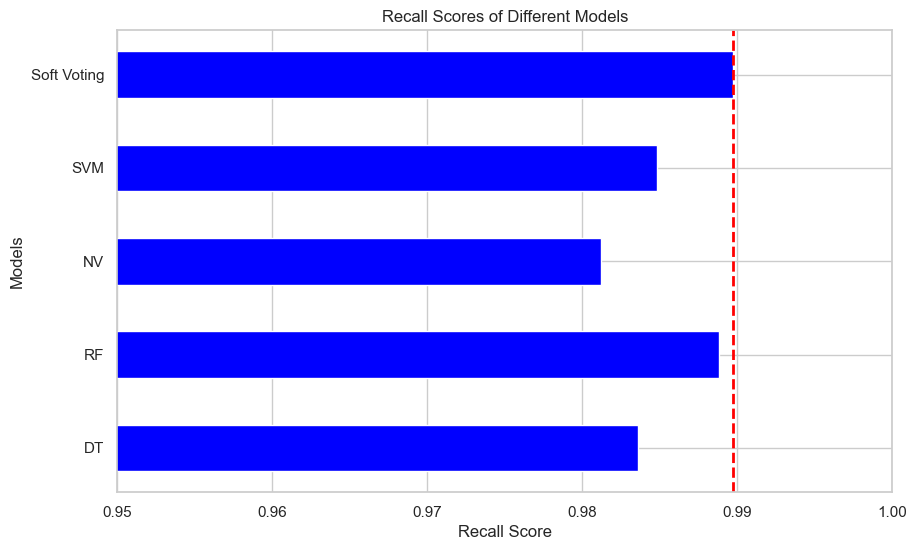

In [79]:
soft_voting_recall = 0.989729
other_models_recall = {
    'DT': 0.983574,
    'RF': 0.988853,
    'NV': 0.981229,
    'SVM': 0.984852
}


other_models_recall['Soft Voting'] = soft_voting_recall


data_to_plot = [list(other_models_recall.values())]
model_names = list(other_models_recall.keys())


plt.figure(figsize=(10, 6))
plt.barh(range(len(data_to_plot[0])), data_to_plot[0], color='blue', height=0.5)

plt.yticks(range(len(data_to_plot[0])), model_names)
plt.xlim(0.9500, 1.0000)  # Setting x-axis limits


max_recall = max(data_to_plot[0])
plt.axvline(x=max_recall, color='red', linestyle='--', linewidth=2)

plt.title('Recall Scores of Different Models')
plt.xlabel('Recall Score')
plt.ylabel('Models')
plt.grid(True)
plt.show()

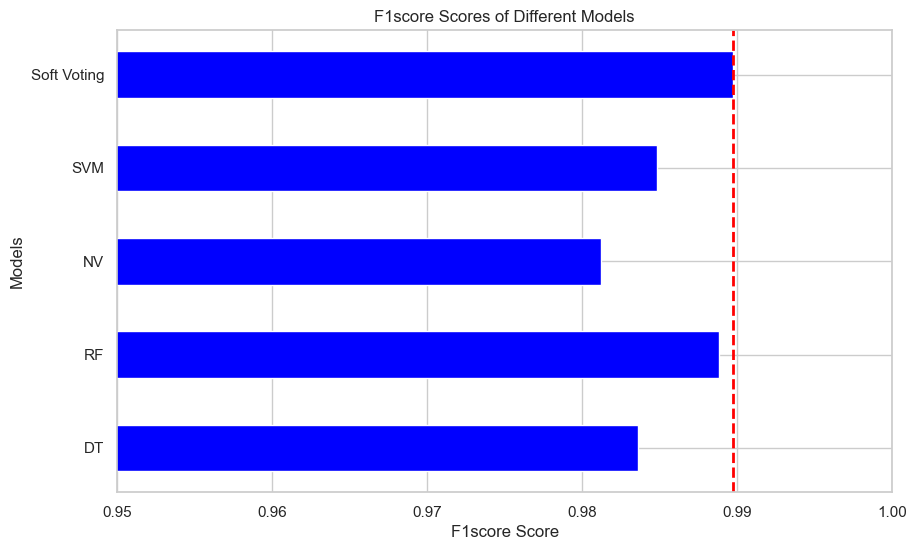

In [80]:
soft_voting_f1score = 0.989732
other_models_f1score = {
    'DT': 0.98357,
    'RF': 0.988857,
    'NV': 0.981225,
    'SVM': 0.985029
}

other_models_recall['Soft Voting'] = soft_voting_recall


data_to_plot = [list(other_models_recall.values())]
model_names = list(other_models_recall.keys())


plt.figure(figsize=(10, 6))
plt.barh(range(len(data_to_plot[0])), data_to_plot[0], color='blue', height=0.5)

plt.yticks(range(len(data_to_plot[0])), model_names)
plt.xlim(0.9500, 1.0000)  # Setting x-axis limits

max_recall = max(data_to_plot[0])
plt.axvline(x=max_recall, color='red', linestyle='--', linewidth=2)

plt.title('F1score Scores of Different Models')
plt.xlabel('F1score Score')
plt.ylabel('Models')
plt.grid(True)
plt.show()

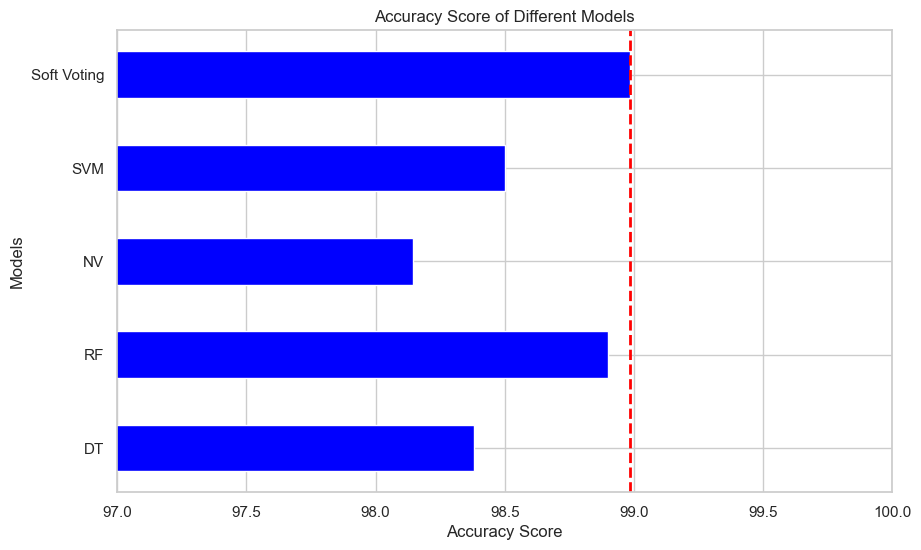

In [81]:
soft_voting_accuracy = 98.98539
other_models_accuracy = {
    'DT': 98.3791140806731,
    'RF': 98.89878742885423,
    'NV': 98.14402375649591,
    'SVM': 98.50284583024003
}

other_models_accuracy['Soft Voting'] = soft_voting_accuracy

data_to_plot = [list(other_models_accuracy.values())]
model_names = list(other_models_accuracy.keys())

plt.figure(figsize=(10, 6))
plt.barh(range(len(data_to_plot[0])), data_to_plot[0], color='blue', height=0.5)

plt.yticks(range(len(data_to_plot[0])), model_names)
plt.xlim(97.0000, 100.0000)  # Setting x-axis limits

max_f1score = max(data_to_plot[0])
plt.axvline(x=max_f1score, color='red', linestyle='--', linewidth=2)

plt.title('Accuracy Score of Different Models')
plt.xlabel('Accuracy Score')
plt.ylabel('Models')
plt.grid(True)
plt.show()

<p> Soft Voting Ensemble outperforms among other remaining algorithms </p>